In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading dataset

In [64]:
depart_df = pd.read_csv('Big Mart.csv')
depart_df.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [65]:
depart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [66]:
depart_df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [67]:
depart_df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [68]:
depart_df.Weight.mean()

12.857645184136183

In [69]:
depart_df.OutletSize.value_counts()

Medium    2793
Small     2388
High       932
Name: OutletSize, dtype: int64

In [70]:
len(depart_df.OutletSize)

8523

### 2. Label Encoding

In [71]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
depart_df['ProductID'] = label_encoder.fit_transform(depart_df['ProductID'])

depart_df.FatContent = label_encoder.fit_transform(depart_df.FatContent)
depart_df.OutletID = label_encoder.fit_transform(depart_df.OutletID)
depart_df.LocationType = label_encoder.fit_transform(depart_df.LocationType)
depart_df.OutletType = label_encoder.fit_transform(depart_df.OutletType)
depart_df.ProductType = label_encoder.fit_transform(depart_df.ProductType)

In [72]:
x_train.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,LocationType,OutletType,Medium,Small
7286,54,6.13,1,0.000000,4,60.1536,1,1987,2,1,0,0
3046,366,NaN,1,0.150807,5,149.0076,4,1985,0,0,0,1
4079,19,10.60,1,0.056749,4,233.6642,1,1987,2,1,0,0
2254,41,4.61,1,0.122843,7,172.4396,9,1999,0,1,1,0
2915,408,18.85,1,0.042891,3,257.6330,2,2007,1,1,0,0


In [73]:
depart_df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

### 3. Checking Correlation

<AxesSubplot:>

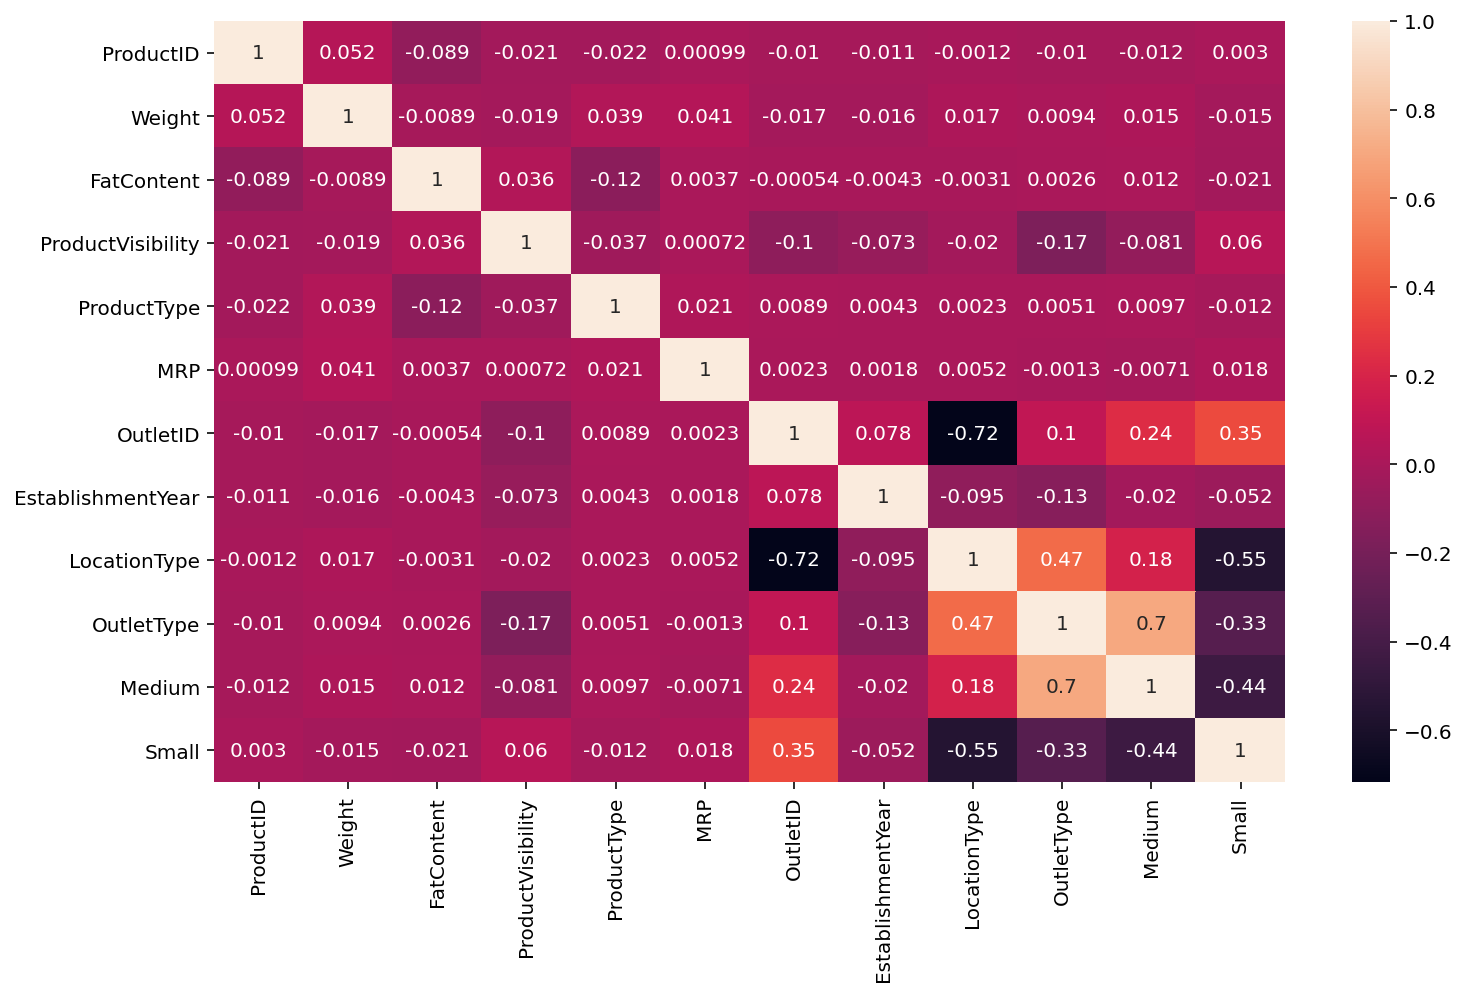

In [74]:
x_train_corr = x_train.corr()
sns.heatmap(x_train_corr,annot=True)

### 4. Splitting data

In [75]:
from sklearn.model_selection import train_test_split
x = depart_df.drop('OutletSales',axis=1)
y = depart_df['OutletSales']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=5)

### 5. Handling Missing Values

In [76]:
def impute_nan_random_samples(df,x_train,variable):
    random_sample = x_train[variable].dropna().sample(df[variable].isna().sum(), random_state=10)
    random_sample.index = df[df[variable].isna()].index
    df.loc[df[variable].isna(), variable] = random_sample

In [77]:
impute_nan_random_samples(depart_df,x_train, "Weight")
impute_nan_random_samples(depart_df,x_train, "OutletSize")

### 6. One Hot Encoding for OutletSize

In [78]:
depart_df.astype({'OutletSize':str})

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.300,1,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,Small,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,High,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,High,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,Medium,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,Small,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,Medium,2,2,1845.5976


In [79]:
one_hot_df = pd.get_dummies(depart_df.OutletSize, drop_first=True)
depart_df = depart_df.drop('OutletSize', axis=1)
depart_df = depart_df.join(one_hot_df)
depart_df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,LocationType,OutletType,OutletSales,Medium,Small
0,156,9.30,1,0.016047,4,249.8092,9,1999,0,1,3735.1380,1,0
1,8,5.92,2,0.019278,14,48.2692,3,2009,2,2,443.4228,1,0
2,662,17.50,1,0.016760,10,141.6180,9,1999,0,1,2097.2700,1,0
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,0,732.3800,0,1
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2,1,994.7052,0,0


In [80]:
from sklearn.model_selection import train_test_split
x = depart_df.drop('OutletSales',axis=1)
y = depart_df['OutletSales']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [81]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [82]:
print(xgboost.__version__)

0.90


In [83]:
model = XGBRegressor(n_estimators= 1000,max_depth=7,eta=0.1,)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=5)

In [84]:
scores = cross_val_score(model,x_train,y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

[02:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:51:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:51:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:52:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:54:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:54:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:55:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:55:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:56:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[02:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
scores = abs(scores)
print('Mean MAE : %.3f (%.3f)'% (scores.mean(), scores.std()))

Mean MAE : 855.851 (33.140)


In [86]:
scores

array([898.27700006, 870.31525703, 867.13785531, 840.17973703,
       868.94250893, 865.88011189, 822.12298835, 865.88704608,
       810.67660365, 838.23667842, 888.95334577, 903.01318504,
       814.59358706, 819.2936302 , 805.25127034, 834.31570954,
       873.30927826, 903.79163972, 841.48592873, 884.0524831 ,
       872.52750699, 838.59733603, 812.62125   , 912.75704271,
       849.33841573, 914.93013181, 858.53462688, 805.02818162,
       817.9120315 , 877.56447329])

In [87]:
model.fit(x_train,y_train)

[02:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.1, max_depth=7, n_estimators=1000)

In [88]:
y_pred = model.predict(x_test)

In [89]:
y_pred

array([1732.0442 ,   93.88602,  536.93463, ..., -168.83696, 1358.5356 ,
       1852.3925 ], dtype=float32)

In [90]:
y_test

2095    1231.7300
3271     119.1782
5055    1030.6584
8307    1201.7690
1923     719.0640
          ...    
2079     525.3162
4490     402.8090
477      165.7842
1897     972.0680
369     1230.3984
Name: OutletSales, Length: 1705, dtype: float64

<AxesSubplot:xlabel='OutletSales'>

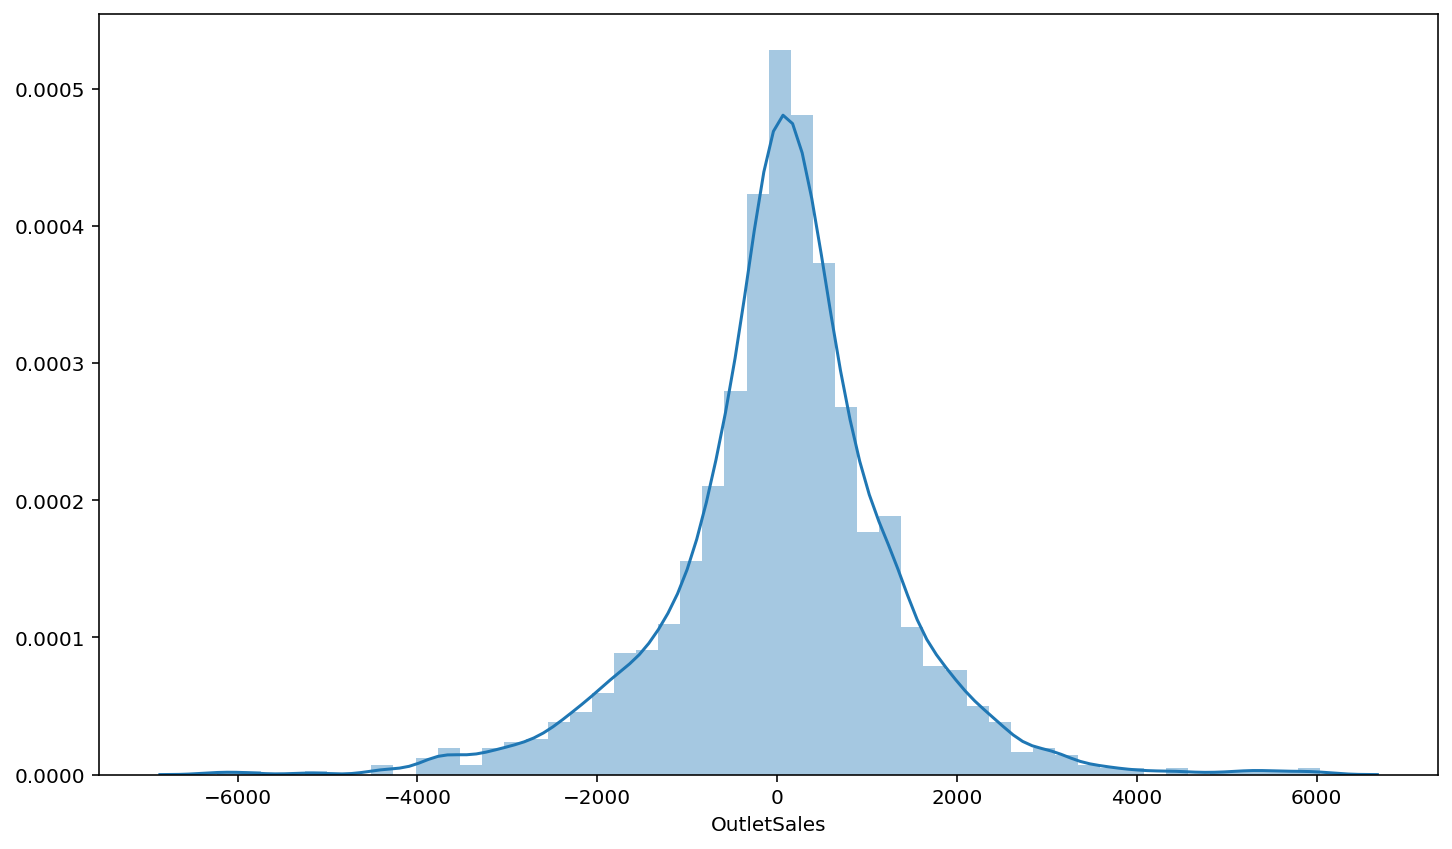

In [91]:
sns.distplot(y_pred-y_test)

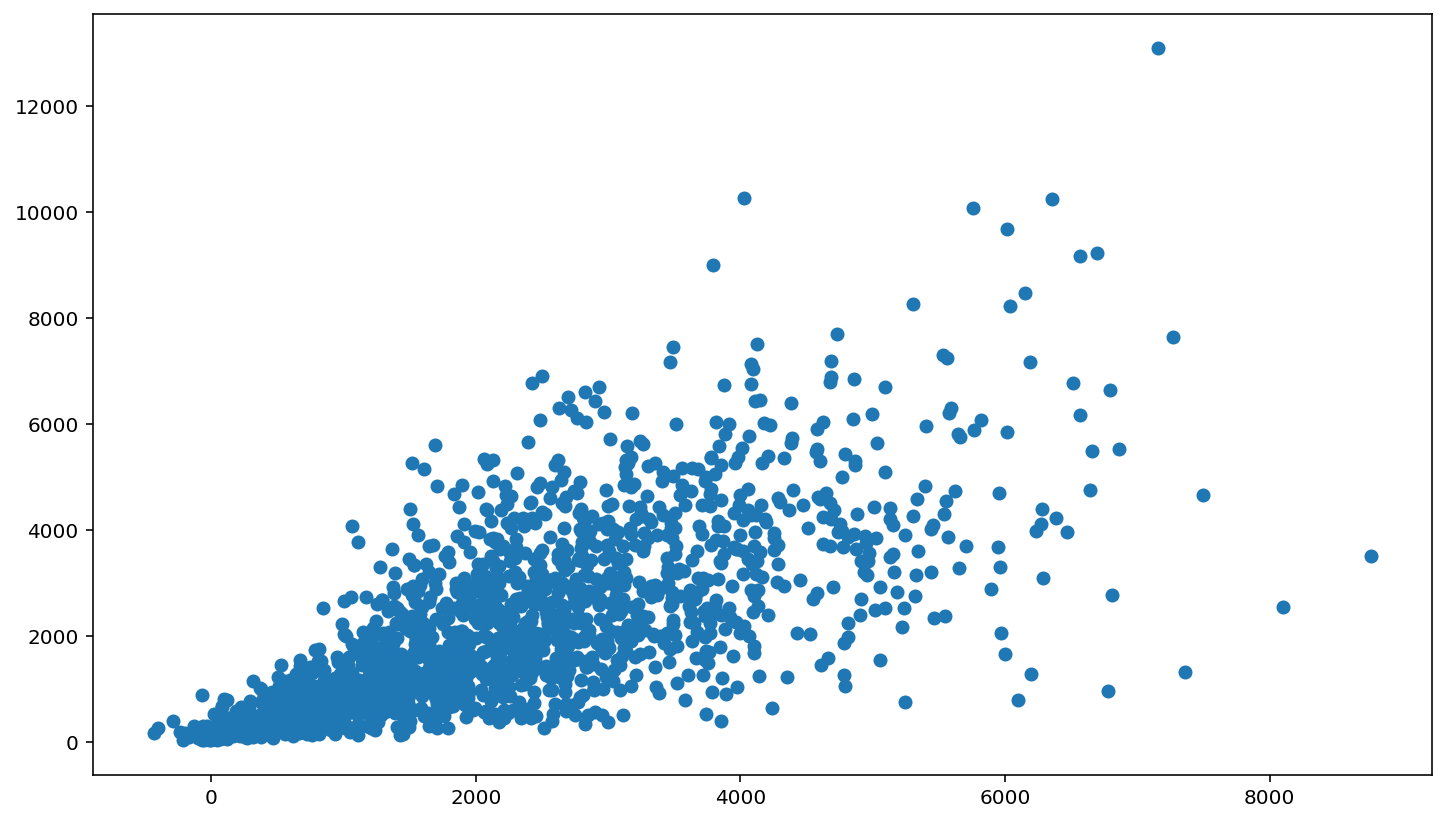

In [92]:
plt.scatter(y_pred,y_test)